# Process DIGS results

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from Bio.Seq import Seq
from Bio import SeqIO
from Bio import Entrez

In [2]:
Entrez.email = "u.litvin.1@research.gla.ac.uk"

In [6]:
genome_path_file = '../digs/sup_table_1_digs_genomes_table.csv'

organisms_dict = {'Adenovirus':[],
                  'Betaherpesvirus':[],
                  'Cytomegalovirus':[],
                  'Mammalia':[]}

genomes = pd.read_csv(genome_path_file)

for index, row in genomes.iterrows():

    organism = row['organism']
    group = row['organism_group']

    organisms_dict[group].append(organism)

## Load a table with DIGS results

In [7]:
digs_results_file = '../digs/digs_raw_results.csv'

digs_results = pd.read_csv(digs_results_file)

taxon = []

for index, row in digs_results.iterrows():

    if row['organism'] in organisms_dict['Adenovirus']:
        taxon.append('Adenovirus')
    elif row['organism'] in organisms_dict['Betaherpesvirus']:
        taxon.append('Betaherpesvirus')
    elif row['organism'] in organisms_dict['Cytomegalovirus']:
        taxon.append('Cytomegalovirus')
    elif row['organism'] in organisms_dict['Mammalia']:
        taxon.append('Mammalia')
    else:
        taxon.append('missing')

digs_results['taxon'] = taxon

In [8]:
digs_results

,record_ID,organism,target_datatype,target_version,target_name,probe_type,scaffold,extract_start,extract_end,sequence_length,...,evalue_exp,subject_start,subject_end,query_start,query_end,align_len,gap_openings,mismatches,timestamp,taxon
0,2860,Papio_anubis,complete,ensembl_79_PapAnu2.0,Papio_anubis.PapAnu2.0.dna.chromosome.X.fa,ORF,X_dna:chromosome_chromosome:PapAnu2.0:X:1:1431...,9248612,9248737,126,...,0,0,0,0,0,0,0,0,2023-10-07 04:21:48,Mammalia
1,3544,Sus_scrofa,complete,ensembl_79_Sscrofa10.2,Sus_scrofa.Sscrofa10.2.dna.chromosome.2.fa,ORF,2_dna:chromosome_chromosome:Sscrofa10.2:2:1:16...,36324042,36324152,111,...,0,0,0,0,0,0,0,0,2023-10-07 07:45:16,Mammalia
2,3981,Macaca_fascicularis,complete,5.0,mfa_ref_Macaca_fascicularis_5.0_chr20.fa,ORF,NC_022291.1,61966984,61967196,213,...,0,0,0,0,0,0,0,0,2023-10-07 09:54:48,Mammalia
3,6600,Rattus_norvegicus,complete,ensembl_79_Rnor_5.0,Rattus_norvegicus.Rnor_5.0.dna.chromosome.1.fa,ORF,1_dna:chromosome_chromosome:Rnor_5.0:1:1:29009...,122438655,122438903,249,...,0,0,0,0,0,0,0,0,2023-10-07 22:37:23,Mammalia
4,7534,Cavia_porcellus,complete,ensembl_79_cavPor3,Cavia_porcellus.cavPor3.dna.nonchromosomal.fa,ORF,scaffold_10_dna:scaffold_scaffold:cavPor3:scaf...,3127262,3127492,231,...,0,0,0,0,0,0,0,0,2023-10-08 04:55:55,Mammalia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11483,11039,human_betaherpesvirus_5,complete,AY446894.2,AY446894.2_Human_herpesvirus_5_strain_Merlin_c...,ORF,AY446894.2,9850,11091,1242,...,1,1,414,1,1242,414,0,0,2023-10-08 23:13:38,Cytomegalovirus
11484,13429,macacine_betaherpesvirus_3,complete,AY186194.1,AY186194.1_Rhesus_cytomegalovirus_strain_68-1_...,ORF,AY186194.1,14707,15639,933,...,1,1,311,1,933,311,0,0,2023-10-09 10:46:31,Cytomegalovirus
11485,13272,japanese_macacine_betaherpesvirus,complete,MT157324.1,MT157324.1_Japanese_cytomegalovirus_strain_246...,ORF,MT157324.1,13629,14807,1179,...,1,1,393,1,1179,393,0,0,2023-10-09 10:08:11,Cytomegalovirus
11486,13431,macacine_betaherpesvirus_8,complete,JN227533.1,JN227533.1_Cynomolgus_macaque_cytomegalovirus_...,ORF,JN227533.1,9222,10163,942,...,1,1,314,1,942,314,0,0,2023-10-09 10:46:40,Cytomegalovirus


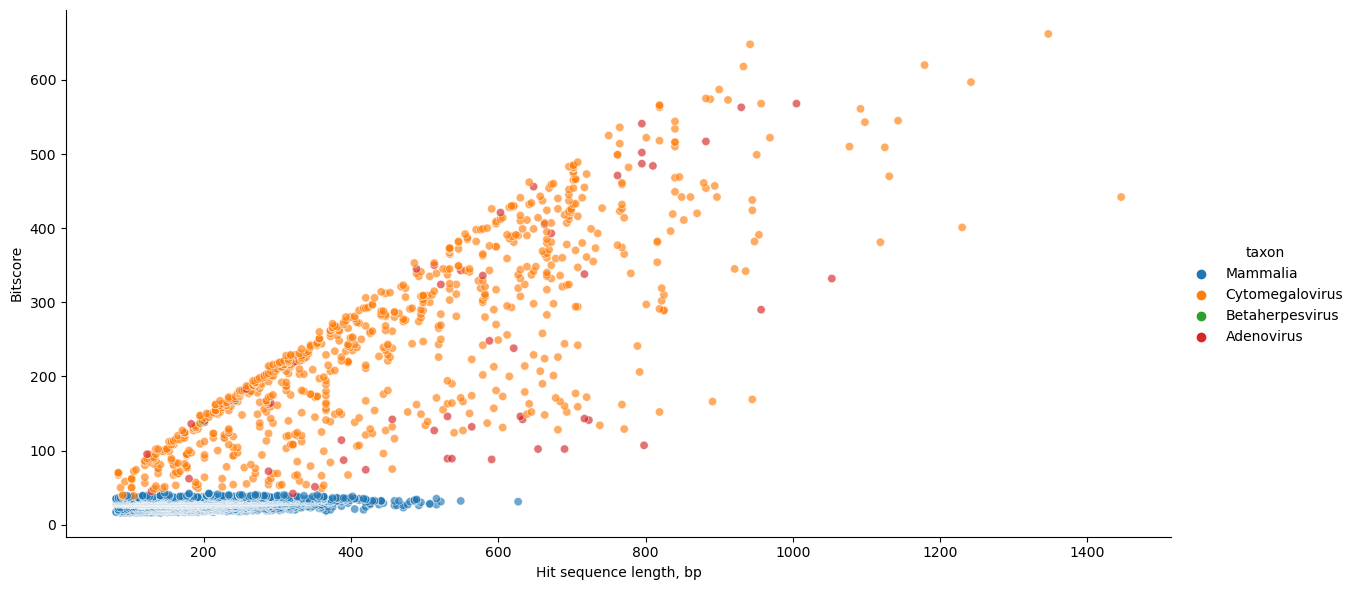

In [9]:
p = sns.relplot(data=digs_results[digs_results['bitscore'] > 0], x='sequence_length', y='bitscore', hue='taxon', alpha=0.65, height=6, aspect=2)
p.set_axis_labels(x_var='Hit sequence length, bp', y_var='Bitscore', clear_inner=True)

## Extract translated CDSs corresponding to DIGS hits with bitscore above 46

In [11]:
digs_results = digs_results[digs_results['bitscore'] > 46]

digs_results_sorted = digs_results.sort_values(by=['scaffold'])

In [12]:
digs_results_sorted

,record_ID,organism,target_datatype,target_version,target_name,probe_type,scaffold,extract_start,extract_end,sequence_length,...,evalue_exp,subject_start,subject_end,query_start,query_end,align_len,gap_openings,mismatches,timestamp,taxon
11191,10584,human_adenovirus_8,complete,AB448767,AB448767.1_Human_adenovirus_8_genomic_DNA_comp...,ORF,AB448767.1,27707,28663,957,...,99,1,335,1,957,339,5,135,2023-10-08 20:35:14,Adenovirus
10763,12536,human_adenovirus_8,complete,AB448767,AB448767.1_Human_adenovirus_8_genomic_DNA_comp...,ORF,AB448767.1,28262,28648,387,...,34,207,330,7,387,127,1,45,2023-10-09 06:04:50,Adenovirus
10641,10513,human_adenovirus_8,complete,AB448767,AB448767.1_Human_adenovirus_8_genomic_DNA_comp...,ORF,AB448767.1,27581,27760,180,...,16,54,112,1,177,59,0,34,2023-10-08 20:01:06,Adenovirus
10847,10585,human_adenovirus_8,complete,AB448767,AB448767.1_Human_adenovirus_8_genomic_DNA_comp...,ORF,AB448767.1,27518,28048,531,...,46,1,112,190,525,112,0,44,2023-10-08 20:35:14,Adenovirus
10839,3130,human_adenovirus_8,complete,AB448767,AB448767.1_Human_adenovirus_8_genomic_DNA_comp...,ORF,AB448767.1,28202,28657,456,...,44,186,333,1,456,152,2,54,2023-10-07 05:34:53,Adenovirus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11435,16304,japanese_macacine_betaherpesvirus,complete,MT157324.1,MT157324.1_Japanese_cytomegalovirus_strain_246...,ORF,MT157324.1,180095,181225,1131,...,169,1,377,1,1131,377,0,0,2023-10-10 02:12:14,Cytomegalovirus
10835,10714,japanese_macacine_betaherpesvirus,complete,MT157324.1,MT157324.1_Japanese_cytomegalovirus_strain_246...,ORF,MT157324.1,12542,12739,198,...,46,83,148,1,198,66,0,0,2023-10-08 21:10:00,Cytomegalovirus
10840,10698,human_adenovirus_12,complete,X73487.1,X73487.1_Adenovirus_type_12_DNA_complete_genom...,ORF,X73487.1,27429,28145,717,...,44,15,232,4,636,225,6,106,2023-10-08 21:09:11,Adenovirus
10800,7515,human_adenovirus_12,complete,X73487.1,X73487.1_Adenovirus_type_12_DNA_complete_genom...,ORF,X73487.1,27522,28034,513,...,39,48,209,4,489,165,3,80,2023-10-08 04:53:17,Adenovirus


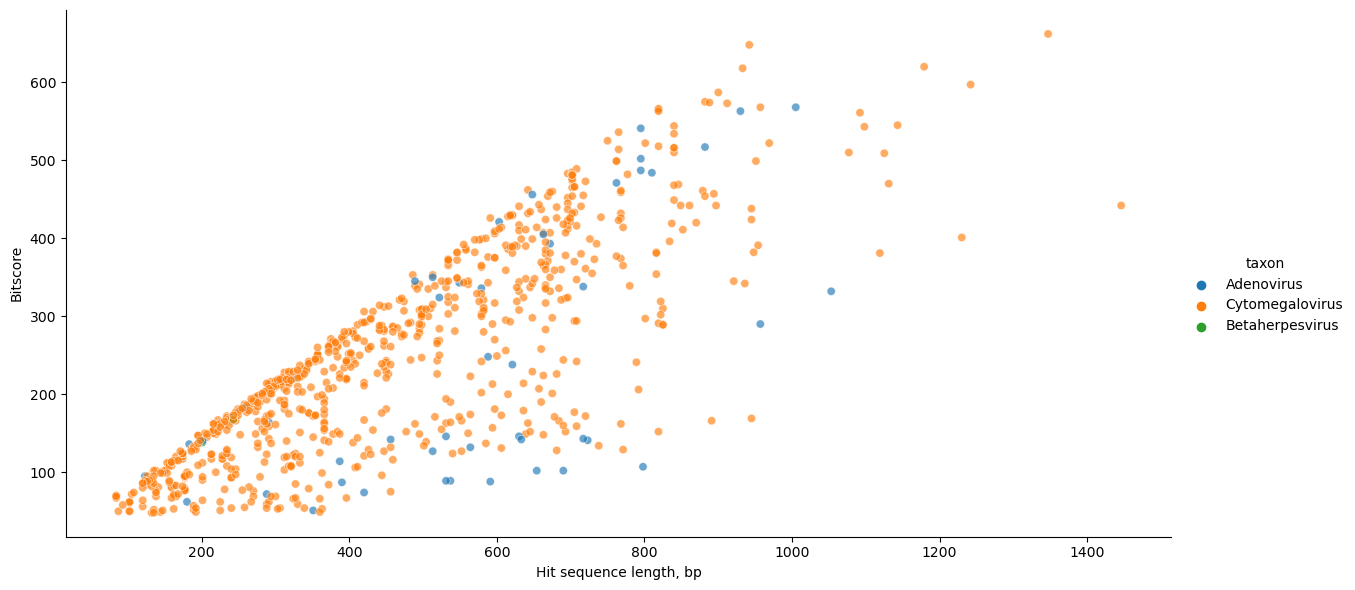

In [13]:
p = sns.relplot(data=digs_results_sorted, x='sequence_length', y='bitscore', hue='taxon', alpha=0.65, height=6, aspect=2)
p.set_axis_labels(x_var='Hit sequence length, bp', y_var='Bitscore', clear_inner=True)

## Extract translated CDSs corresponding to DIGS hits into a FASTA file
1. access an HCMV genome using a corresponding accession number
2. locate the DIGS hit in the genome
3. loop through all amino acids downstream the hit (same reading frame) until you find a stop codon (*)
4. loop through all amino acids upstream the hit (same reading frame) until you find a stop codon (*)
5. loop through the amino acid sequence starting from the upstream stop codon until you find the first M (start codon)
6. loop through the amino acid sequence starting from the start codon until you find the first stop codon, if the sequence has an internal stop codon
7. print the amino acid sequence from the first M (start codon) to the downstream stop (not included)

In [14]:
genome_accession_number = ''

CDS_extract_starts = []
CDS_extract_ends = []
ext_CDS_seqs = []
mod_CDS_seqs = []
trCDS_seqs = []
trCDS_seq_lens = []

for index, row in digs_results_sorted.iterrows():

    # access a fasta file with a virus genome from the Genbank using its accession number
    if row['scaffold'] != genome_accession_number:
        genome_accession_number = row['scaffold']
        with Entrez.efetch(db="nucleotide", rettype="fasta", retmode="text", id=genome_accession_number) as handle:
            genome = SeqIO.read(handle, "fasta")
    
    # store data about hits identified by DIGS
    digs_sequence = Seq(row['sequence'].upper())
    g_start = row['extract_start'] - 1
    g_end = row['extract_end']
    orientation = row['orientation']
    record_id = row['record_ID']
    gene_name = row['assigned_gene']
    organism = row['organism']

    # store the sequence corresponding sequence to the DIGS hit
    if orientation == '+':
        digs_hit = genome.seq[g_start:g_end].upper()
    elif orientation == '-':
        digs_hit = genome.seq[g_start:g_end].reverse_complement().upper()
    else:
        continue
    
    print(gene_name, record_id, orientation)
    
    # identify and store the entire CDS corresponding to the DIGS hit on (+) strand
    # loop through all amino acids downstream and upstream the hit (same reading frame) until you find stop codons (*) that surround it
    if orientation == '+':
        while not str(genome.seq[g_start:g_end].translate()).endswith('*'):
            g_end += 3
        while not str(genome.seq[g_start:g_end].translate()).startswith('*'):
            g_start -= 3
        
        # exclude 5' and 3' stop codons from the coordinates of extended CDS
        g_start += 3
        g_end -= 3
        ext_cds = genome.seq[g_start:g_end]
        ext_tr_cds = genome.seq[g_start:g_end].translate()
        
        print(ext_tr_cds, g_start, g_end)

        # check that extended CDS does not contain stop codon(s)
        # if extended CDS contains stop codon(s), continue with the longest CDS that starts with M
        if '*' in ext_tr_cds:
            ext_tr_cds_list = ext_tr_cds.split('*')
            ext_tr_cds_dict = {}
            p_start = 0
            p_end = len(ext_tr_cds) - 1

            # store peptides and their start and end coordinates in respect to the start of the extended CDS
            c_start = 0
            for i in ext_tr_cds_list:
                c_end = c_start + len(i) - 1
                ext_tr_cds_dict[i] = [c_start, c_end]
                c_start = c_end + 2

            m_tr_cds_list = []
            m_tr_cds_dict = {}
            
            # store peptides that start from M and their start and end coordinates in respect to the start of the extended CDS
            for k, v in ext_tr_cds_dict.items():
                for i in range(len(k)):
                    if k[i] == 'M':
                        m_tr_cds = k[i:]
                        m_tr_cds_list.append(m_tr_cds)
                        m_tr_cds_dict[m_tr_cds] = [v[0]+i,v[1]]
                        break
                    else:
                        continue

            if not m_tr_cds_dict:
                m_tr_cds = 'NO_M_BETWEEN_STOPS'
            else:
                m_tr_cds_list.sort(key=len,reverse=True)
                m_tr_cds = m_tr_cds_list[0]
                c_start, c_end = m_tr_cds_dict[m_tr_cds]
                g_start = g_start + 3 * c_start
                g_end = g_end - 3 * (p_end - c_end)
        else:
            # loop through the amino acid sequence starting from the upstream stop until you find the first M (start codon)
            for i in range(len(ext_tr_cds)):
                if ext_tr_cds[i] == 'M':
                    m_tr_cds = ext_tr_cds[i:]
                    break
                else:
                    m_tr_cds = 'NO_M_BETWEEN_STOPS'
                    g_start += 3
                    continue
        
        print(m_tr_cds, g_start, g_end)

        mod_cds = genome.seq[g_start:g_end]
        mod_g_start = g_start + 1
        mod_g_end = g_end + 3


    # identify and store the entire CDS corresponding to the DIGS hit on (+) strand
    # loop through all amino acids downstream and upstream the hit (same reading frame) until you find stop codons (*) that surround it
    elif orientation == '-':
        while not str(genome.seq[g_start:g_end].reverse_complement().translate()).endswith('*'):
            g_start -= 3
        while not str(genome.seq[g_start:g_end].reverse_complement().translate()).startswith('*'):
            g_end += 3
        
        # exclude 5' and 3' stop codons from the coordinates of extended CDS
        g_start += 3
        g_end -= 3
        ext_cds = genome.seq[g_start:g_end].reverse_complement()
        ext_tr_cds = genome.seq[g_start:g_end].reverse_complement().translate()

        print(ext_tr_cds, g_start, g_end)

        # check that extended CDS does not contain stop codon(s)
        # if extended CDS contains stop codon(s), continue with the longest CDS that starts with M
        if '*' in ext_tr_cds:
            ext_tr_cds_list = ext_tr_cds.split('*')
            ext_tr_cds_dict = {}
            p_start = 0
            p_end = len(ext_tr_cds) - 1

            # store peptides and their start and end coordinates in respect to the start of the extended CDS
            c_start = 0
            for i in ext_tr_cds_list:
                c_end = c_start + len(i) - 1
                ext_tr_cds_dict[i] = [c_start, c_end]
                c_start = c_end + 2

            m_tr_cds_list = []
            m_tr_cds_dict = {}
            
            # store peptides that start from M and their start and end coordinates in respect to the start of the extended CDS
            for k, v in ext_tr_cds_dict.items():
                for i in range(len(k)):
                    if k[i] == 'M':
                        m_tr_cds = k[i:]
                        m_tr_cds_list.append(m_tr_cds)
                        m_tr_cds_dict[m_tr_cds] = [v[0]+i,v[1]]
                        break
                    else:
                        continue

            if not m_tr_cds_dict:
                m_tr_cds = 'NO_M_BETWEEN_STOPS'
            else:
                m_tr_cds_list.sort(key=len,reverse=True)
                m_tr_cds = m_tr_cds_list[0]
                c_start, c_end = m_tr_cds_dict[m_tr_cds_list[0]]
                g_start = g_start + 3 * (p_end - c_end)
                g_end = g_end - 3 * c_start
        else:
            # loop through the amino acid sequence starting from the upstream stop until you find the first M (start codon)
            for i in range(len(ext_tr_cds)):
                if ext_tr_cds[i] == 'M':
                    m_tr_cds = ext_tr_cds[i:]
                    break
                else:
                    m_tr_cds = 'NO_M_BETWEEN_STOPS'
                    g_end -= 3
                    continue
        
        print(m_tr_cds, g_start, g_end)

        mod_cds = genome.seq[g_start:g_end].reverse_complement()
        mod_g_start = g_start - 2
        mod_g_end = g_end

    # add CDS start, end positions, translated seq and its len to the corresponding lists
    CDS_extract_starts.append(mod_g_start)
    CDS_extract_ends.append(mod_g_end)
    ext_CDS_seqs.append(str(ext_cds))
    mod_CDS_seqs.append(str(mod_cds))
    trCDS_seqs.append(str(m_tr_cds))
    trCDS_seq_lens.append(len(str(m_tr_cds)))

# add new columns to the dataframe
digs_results_sorted['CDS_extract_start'] = CDS_extract_starts
digs_results_sorted['CDS_extract_end'] = CDS_extract_ends
digs_results_sorted['ext_CDS_sequence'] = ext_CDS_seqs
digs_results_sorted['mod_CDS_sequence'] = mod_CDS_seqs
digs_results_sorted['translated_CDS_sequence'] = trCDS_seqs
digs_results_sorted['translated_CDS_sequence_length'] = trCDS_seq_lens

CR1-beta 10584 +
SASPGMEMRRRKNCYKFFLFFHSTMNTLTSVVLLSLLVAFSQAGIINLNVLWGINLTLVGPLDLPVTWYDKKGMQFCIGNTIKNPQIKHSCDQQNLTLLNADKSHERTYLGYRHDSKGKVDYKVTVIPPPPTTRKPLSEPHYVTVTMDHNITLVGPLNLPVTWYDGEGNKFCDGEKVEHAEFNHTCNIQNLTLLFVNLTHNGAYIGYTKDGSDRELYEVSVKTLFQNGAKQSKVEQGNTAQSGGKKTKTEHRNHSAKTKSTNNLQPTQLYVRPFTNVSLTGPPNGKVIWYDGELNDPCEQKYKLRTFCNQQNLTLINVTSTYDGIYYGTDEKDKANRYRIKVNTTNHKTVKIKPHTKKPSAKQQKQFKLQVTKTNKNQSQIPSATVAIVAGVIAGFVTLIIVFLCYICCRKRLRAYNHMVDPLLSFSY 27379 28663
MEMRRRKNCYKFFLFFHSTMNTLTSVVLLSLLVAFSQAGIINLNVLWGINLTLVGPLDLPVTWYDKKGMQFCIGNTIKNPQIKHSCDQQNLTLLNADKSHERTYLGYRHDSKGKVDYKVTVIPPPPTTRKPLSEPHYVTVTMDHNITLVGPLNLPVTWYDGEGNKFCDGEKVEHAEFNHTCNIQNLTLLFVNLTHNGAYIGYTKDGSDRELYEVSVKTLFQNGAKQSKVEQGNTAQSGGKKTKTEHRNHSAKTKSTNNLQPTQLYVRPFTNVSLTGPPNGKVIWYDGELNDPCEQKYKLRTFCNQQNLTLINVTSTYDGIYYGTDEKDKANRYRIKVNTTNHKTVKIKPHTKKPSAKQQKQFKLQVTKTNKNQSQIPSATVAIVAGVIAGFVTLIIVFLCYICCRKRLRAYNHMVDPLLSFSY 27394 28663
CR1-beta 12536 +
SASPGMEMRRRKNCYKFFLFFHSTMNTLTSVVLLSLLVAFSQAGIINLNVLWGINLTLVGPLDLPVTWYDKKGMQFCIGNTIKNPQIKH

## Remove sequences that do not contain a start codon

In [17]:
digs_results_translated = digs_results_sorted[digs_results_sorted['translated_CDS_sequence'] != 'NO_M_BETWEEN_STOPS']

## Keep a set of non-redundant sequences

In [19]:
digs_sorted = digs_results_translated.sort_values(by=['organism', 'scaffold', 'CDS_extract_start', 'align_len'],
                                                  ascending=[True, True, True, False])
cols = digs_sorted.columns.tolist()
cols = ['record_ID',
        'organism',
        'target_datatype',
        'target_version',
        'target_name',
        'probe_type',
        'extract_start',
        'extract_end',
        'sequence_length',
        'sequence',
        'assigned_name',
        'assigned_gene',
        'bitscore',
        'identity',
        'evalue_num',
        'evalue_exp',
        'subject_start',
        'subject_end',
        'query_start',
        'query_end',
        'align_len',
        'gap_openings',
        'mismatches',
        'timestamp',
        'taxon',
        'scaffold',
        'orientation',
        'CDS_extract_start',
        'CDS_extract_end',
        'ext_CDS_sequence',
        'mod_CDS_sequence',
        'translated_CDS_sequence',
        'translated_CDS_sequence_length']

digs_sorted = digs_sorted[cols]

digs_sorted['CDS_coordinates'] = digs_sorted[digs_sorted.columns[25:29]].apply(
    lambda x: '|'.join(x.dropna().astype(str)), axis=1)

digs_sorted_no_dups = digs_sorted.drop_duplicates(subset=['CDS_coordinates'])

In [20]:
digs_sorted_no_dups

,record_ID,organism,target_datatype,target_version,target_name,probe_type,extract_start,extract_end,sequence_length,sequence,...,taxon,scaffold,orientation,CDS_extract_start,CDS_extract_end,ext_CDS_sequence,mod_CDS_sequence,translated_CDS_sequence,translated_CDS_sequence_length,CDS_coordinates
11458,15261,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,4310,5074,765,ATGTGGCTGGGAGTTTTCCACTACCTCACCATCTTTACGGGAATAG...,...,Cytomegalovirus,FJ483968.2,+,4310,5077,ATAAGAGGTTCAACGGTCGCCTGGAAAGCCCCTGCTATCATGTGGC...,ATGTGGCTGGGAGTTTTCCACTACCTCACCATCTTTACGGGAATAG...,MWLGVFHYLTIFTGIVLTAVSGNSGKNNNVTLVEVGIGQNVTLNYS...,255,FJ483968.2|+|4310|5077
11202,15122,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,5201,5812,612,TCTATTTTCACAAAATCAATGATACATAAATACAAAAACGTACTAC...,...,Cytomegalovirus,FJ483968.2,+,5219,5848,GTCGTTCGCGTTATTTCACTAAAAACTACCTACTCTATTTTCACAA...,ATGATACATAAATACAAAAACGTACTACATTATCTGTACGTTATGT...,MIHKYKNVLHYLYVMYSLYLDTTHTTALQQFWVPVGGRVTLMDYNT...,209,FJ483968.2|+|5219|5848
10668,7856,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,5850,6305,456,ATTATGAAACTCACTGGACAAAAACATCACACACTCTTATGGCTGT...,...,Cytomegalovirus,FJ483968.2,+,5853,6020,TTTGTGCGGGTTTTGGTTACCTGTATTATCACAAACGTAAAACAAT...,ATGAAACTCACTGGACAAAAACATCACACACTCTTATGGCTGTATA...,MKLTGQKHHTLLWLYTICIFKTAHYIKASSYTLYAHVGGNVTFVDL...,55,FJ483968.2|+|5853|6020
11269,15120,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,6485,6973,489,ATGAAAAACATACCAAATATATTATGCATATATTTACATTTATATA...,...,Cytomegalovirus,FJ483968.2,+,6485,6976,CTCTTTACAAACTACCAGTTTCGATTATACTGCAATAGTTATTGCA...,ATGAAAAACATACCAAATATATTATGCATATATTTACATTTATATA...,MKNIPNILCIYLHLYKTVNHIEAFPSTYHVKAGGGITFVDDSYTDK...,163,FJ483968.2|+|6485|6976
11420,15228,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,7091,7759,669,ATGAACATATATAAAATCACTGTACACCAACTATTGTATAAATGTA...,...,Cytomegalovirus,FJ483968.2,+,7091,7762,TTATATTGTGCTTGGGAACGGGTTATCTCTATCACTACGCAAGAAT...,ATGAACATATATAAAATCACTGTACACCAACTATTGTATAAATGTA...,MNIYKITVHQLLYKCRCLNMYLQIVMVAHVCSISSSIDTLITKNLT...,223,FJ483968.2|+|7091|7762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436,11227,simian_adenovirus_19,complete,KP329565,KP329565.1_Simian_adenovirus_19_strain_AA153_c...,ORF,26763,27524,762,AACGCCTCTACAATTTTTACTCCCGTCGGTTCTAATGTAACTTTTC...,...,Adenovirus,KP329565.1,+,26718,27527,CTTAGTGTTGCTTACCAGCTGTCCAGTTTCTCTAACATGATGCTTA...,ATGATGCTTAAATTGACACTATTACTCTCCCTGTTTACTCTCACTA...,MMLKLTLLLSLFTLTNASTIFTPVGSNVTFQSYYSPYPNKIPYITW...,269,KP329565.1|+|26718|27527
11449,7527,simian_adenovirus_20,complete,HQ605912,HQ605912.1_Simian_adenovirus_20_strain_ATCC_VR...,ORF,27689,28483,795,ATGACTTGGAATGGCTGTCTTGCTTTCTTACTATCTCTGGTTAGCT...,...,Adenovirus,HQ605912.1,+,27689,28486,CGCTTGCACTTTCTTATCTTTTTGTTAATTATGACTTGGAATGGCT...,ATGACTTGGAATGGCTGTCTTGCTTTCTTACTATCTCTGGTTAGCT...,MTWNGCLAFLLSLVSLLSATDFKAEQIYAERGSHTVITLPLEYETS...,265,HQ605912.1|+|27689|28486
11468,7528,simian_adenovirus_3,complete,AY598782,AY598782.1_Simian_adenovirus_3_strain_ATCC_VR-...,ORF,27653,28447,795,ATGACCTGGAACCTTGGTCTCGCTTTTTATTTTTGGCTGCTTAGTG...,...,Adenovirus,AY598782.1,+,27653,28450,ACTATGACCTGGAACCTTGGTCTCGCTTTTTATTTTTGGCTGCTTA...,ATGACCTGGAACCTTGGTCTCGCTTTTTATTTTTGGCTGCTTAGTG...,MTWNLGLAFYFWLLSAQASKINIFNKYAEEGANTIFTIPAKITKPY...,265,AY598782.1|+|27653|28450
10734,10520,simian_adenovirus_55,complete,KX505867,KX505867.1_Simian_mastadenovirus_WIV19_complet...,ORF,27257,27946,690,ATGACCTTGAACCTTTTACTCGCTATTTTGTTCTTTAGTGGTGTTA...,...,Adenovirus,KX505867.1,+,27257,27994,TTTTGTCTTTGTTTCTTAGCAGACATGACCTTGAACCTTTTACTCG...,ATGACCTTGAACCTTTTACTCGCTATTTTGTTCTTTAGTGGTGTTA...,MTLNLLLAILFFSGVNSFNLPTINITAEYGSNLTLYAFKQGEPNNT...,245,KX505867.1|+|27257|27994


## Keep records longer than 75 aa

In [28]:
digs_filtered = digs_sorted_no_dups[digs_sorted_no_dups['translated_CDS_sequence_length'] >= 75]

## Remove hits known not to be RL11 genes

In [29]:
digs_filtered = digs_filtered[digs_filtered['assigned_gene'] != 'UL40']

## Keep HCMV hits only from the Merlin strain

In [30]:
hcmv_genomes = []

for index, row in digs_filtered.iterrows():
    if row['organism'] == 'human_betaherpesvirus_5':
        if row['scaffold'] not in hcmv_genomes:
            hcmv_genomes.append(row['scaffold'])

hcmv_genomes.remove('AY446894.2')

digs_results_no_dups_one_hcmv = digs_filtered

for genome in hcmv_genomes:
    digs_results_no_dups_one_hcmv = digs_results_no_dups_one_hcmv[digs_results_no_dups_one_hcmv['scaffold'] != genome]

In [31]:
digs_results_no_dups_one_hcmv

,record_ID,organism,target_datatype,target_version,target_name,probe_type,extract_start,extract_end,sequence_length,sequence,...,taxon,scaffold,orientation,CDS_extract_start,CDS_extract_end,ext_CDS_sequence,mod_CDS_sequence,translated_CDS_sequence,translated_CDS_sequence_length,CDS_coordinates
11458,15261,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,4310,5074,765,ATGTGGCTGGGAGTTTTCCACTACCTCACCATCTTTACGGGAATAG...,...,Cytomegalovirus,FJ483968.2,+,4310,5077,ATAAGAGGTTCAACGGTCGCCTGGAAAGCCCCTGCTATCATGTGGC...,ATGTGGCTGGGAGTTTTCCACTACCTCACCATCTTTACGGGAATAG...,MWLGVFHYLTIFTGIVLTAVSGNSGKNNNVTLVEVGIGQNVTLNYS...,255,FJ483968.2|+|4310|5077
11202,15122,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,5201,5812,612,TCTATTTTCACAAAATCAATGATACATAAATACAAAAACGTACTAC...,...,Cytomegalovirus,FJ483968.2,+,5219,5848,GTCGTTCGCGTTATTTCACTAAAAACTACCTACTCTATTTTCACAA...,ATGATACATAAATACAAAAACGTACTACATTATCTGTACGTTATGT...,MIHKYKNVLHYLYVMYSLYLDTTHTTALQQFWVPVGGRVTLMDYNT...,209,FJ483968.2|+|5219|5848
11269,15120,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,6485,6973,489,ATGAAAAACATACCAAATATATTATGCATATATTTACATTTATATA...,...,Cytomegalovirus,FJ483968.2,+,6485,6976,CTCTTTACAAACTACCAGTTTCGATTATACTGCAATAGTTATTGCA...,ATGAAAAACATACCAAATATATTATGCATATATTTACATTTATATA...,MKNIPNILCIYLHLYKTVNHIEAFPSTYHVKAGGGITFVDDSYTDK...,163,FJ483968.2|+|6485|6976
11420,15228,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,7091,7759,669,ATGAACATATATAAAATCACTGTACACCAACTATTGTATAAATGTA...,...,Cytomegalovirus,FJ483968.2,+,7091,7762,TTATATTGTGCTTGGGAACGGGTTATCTCTATCACTACGCAAGAAT...,ATGAACATATATAAAATCACTGTACACCAACTATTGTATAAATGTA...,MNIYKITVHQLLYKCRCLNMYLQIVMVAHVCSISSSIDTLITKNLT...,223,FJ483968.2|+|7091|7762
10758,4917,cercopithecine_betaherpesvirus_5,complete,FJ483968.2,FJ483968.2_Cercopithecine_herpesvirus_5_strain...,ORF,11285,11617,333,ATAATATATCTACTAACACTTAAAACGTTATTTTGCTACCATACTA...,...,Cytomegalovirus,FJ483968.2,+,11264,11878,CATTACATTATGTTGAAACCTCAATATATCATAATATATCTACTAA...,ATGTTGAAACCTCAATATATCATAATATATCTACTAACACTTAAAA...,MLKPQYIIIYLLTLKTLFCYHTIHETTHNISVNIYNSVILTNPDNE...,204,FJ483968.2|+|11264|11878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436,11227,simian_adenovirus_19,complete,KP329565,KP329565.1_Simian_adenovirus_19_strain_AA153_c...,ORF,26763,27524,762,AACGCCTCTACAATTTTTACTCCCGTCGGTTCTAATGTAACTTTTC...,...,Adenovirus,KP329565.1,+,26718,27527,CTTAGTGTTGCTTACCAGCTGTCCAGTTTCTCTAACATGATGCTTA...,ATGATGCTTAAATTGACACTATTACTCTCCCTGTTTACTCTCACTA...,MMLKLTLLLSLFTLTNASTIFTPVGSNVTFQSYYSPYPNKIPYITW...,269,KP329565.1|+|26718|27527
11449,7527,simian_adenovirus_20,complete,HQ605912,HQ605912.1_Simian_adenovirus_20_strain_ATCC_VR...,ORF,27689,28483,795,ATGACTTGGAATGGCTGTCTTGCTTTCTTACTATCTCTGGTTAGCT...,...,Adenovirus,HQ605912.1,+,27689,28486,CGCTTGCACTTTCTTATCTTTTTGTTAATTATGACTTGGAATGGCT...,ATGACTTGGAATGGCTGTCTTGCTTTCTTACTATCTCTGGTTAGCT...,MTWNGCLAFLLSLVSLLSATDFKAEQIYAERGSHTVITLPLEYETS...,265,HQ605912.1|+|27689|28486
11468,7528,simian_adenovirus_3,complete,AY598782,AY598782.1_Simian_adenovirus_3_strain_ATCC_VR-...,ORF,27653,28447,795,ATGACCTGGAACCTTGGTCTCGCTTTTTATTTTTGGCTGCTTAGTG...,...,Adenovirus,AY598782.1,+,27653,28450,ACTATGACCTGGAACCTTGGTCTCGCTTTTTATTTTTGGCTGCTTA...,ATGACCTGGAACCTTGGTCTCGCTTTTTATTTTTGGCTGCTTAGTG...,MTWNLGLAFYFWLLSAQASKINIFNKYAEEGANTIFTIPAKITKPY...,265,AY598782.1|+|27653|28450
10734,10520,simian_adenovirus_55,complete,KX505867,KX505867.1_Simian_mastadenovirus_WIV19_complet...,ORF,27257,27946,690,ATGACCTTGAACCTTTTACTCGCTATTTTGTTCTTTAGTGGTGTTA...,...,Adenovirus,KX505867.1,+,27257,27994,TTTTGTCTTTGTTTCTTAGCAGACATGACCTTGAACCTTTTACTCG...,ATGACCTTGAACCTTTTACTCGCTATTTTGTTCTTTAGTGGTGTTA...,MTLNLLLAILFFSGVNSFNLPTINITAEYGSNLTLYAFKQGEPNNT...,245,KX505867.1|+|27257|27994


In [32]:
digs_results_no_dups_one_hcmv.to_csv('../digs/digs_processed_results_bitscore_46_length_75_one_hcmv.csv', header=True, index=False)

In [33]:
digs_num_hits = {}
taxons = []

for index, row in digs_results_no_dups_one_hcmv.iterrows():

    if row['organism'] not in digs_num_hits:
        digs_num_hits[row['organism']] = 1
        taxons.append(row['taxon'])
    else:
        digs_num_hits[row['organism']] += 1

digs_num_hits = pd.DataFrame({'organism': digs_num_hits.keys(),'number_of_hits': digs_num_hits.values()})
digs_num_hits['taxon'] = taxons

In [34]:
digs_num_hits

,organism,number_of_hits,taxon
0,cercopithecine_betaherpesvirus_5,17,Cytomegalovirus
1,elephantid_betaherpesvirus_1,1,Betaherpesvirus
2,elephantid_betaherpesvirus_5,2,Betaherpesvirus
3,human_adenovirus_12,1,Adenovirus
4,human_adenovirus_17,1,Adenovirus
5,human_adenovirus_18,1,Adenovirus
6,human_adenovirus_3,2,Adenovirus
7,human_adenovirus_4,2,Adenovirus
8,human_adenovirus_40,1,Adenovirus
9,human_adenovirus_52,1,Adenovirus
